### Combine Dataframes

### Creating Matrix

In [1]:
import numpy as np
import pandasToMatrix_sixArray
import glob
import os
import pandas as pd
import re 
import json
import datetime
import time
import shutil
import datetime
import pickle
from sklearn import decomposition
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.cluster import KMeans
from numpy import linalg as LA
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Converting .csv files into a matrix

In [ ]:
%time
data_with_time = pandasToMatrix_sixArray.main('2020-08-19')

In [ ]:
len(data_with_time[5])

In [ ]:
def nested_list_to_array(data_with_time_array):
    data = np.zeros((data_with_time_array.shape[0],19))
    for (index,i) in enumerate(data_with_time_array):
        data[index] = np.asarray(data_with_time_array[index])
    return data

In [ ]:
def list_to_np_arr(list_form):
    """Converts list of lists into numpy array."""
    data = np.zeros((1,19))
    for i in list_form:
        data = np.append(data,np.asarray(i), axis = 0)
    data = data[1:]
    data = nested_list_to_array(data)
    return data

In [ ]:
data_with_time_array = list_to_np_arr(data_with_time)

In [ ]:
pickle.dump(data_with_time_array, open('exp_08_19_better_data.p', 'wb'))

### Run from here after running import block to avoid preprocessing

In [2]:
data_with_time_array = pickle.load(open('exp_08_19_better_data.p', 'rb'))

In [3]:
data = data_with_time_array[:,:18]

In [4]:
data.shape

(1680327, 18)

In [5]:

data_mean = np.nanmean(data,axis = 0,keepdims = True)

data = data - data_mean

cdata=np.nan_to_num(data)

In [6]:
# How does the data with time array look?


data_with_time_array[0]

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
        2.73000000e-01, -8.18000000e-01,  5.06000000e-01,             nan,
                   nan,             nan,  1.59784564e+09])

In [7]:
d=18  # dimension
n=cdata.shape[0]
block_size=10000
# calculate covariance matrix

outters = np.zeros((d, d))
for j in range(n):
    outters += np.outer(cdata[j,:],cdata[j,:])
    if j%block_size==0:
        print('\r %d: '%j,end='')
    
_cov = outters/n

#eigen values
eigen_values, eigen_vectors = LA.eig(_cov)


 1680000: 

In [8]:
eigen_values

array([0.20815439, 0.12871512, 0.07660112, 0.04011951, 0.03887129,
       0.0362837 , 0.0293359 , 0.02610542, 0.02309427, 0.01430177,
       0.01077971, 0.00095792, 0.00126424, 0.00683779, 0.00564003,
       0.00324119, 0.00405051, 0.00373437])

In [9]:
eig_val_sorted_indices = np.argsort(eigen_values)
print(eig_val_sorted_indices)
eig_val_sorted_indices = eig_val_sorted_indices[-1::-1]
print(eig_val_sorted_indices)
eig_val_sorted_indices.shape

[11 12 15 17 16 14 13 10  9  8  7  6  5  4  3  2  1  0]
[ 0  1  2  3  4  5  6  7  8  9 10 13 14 16 17 15 12 11]


(18,)

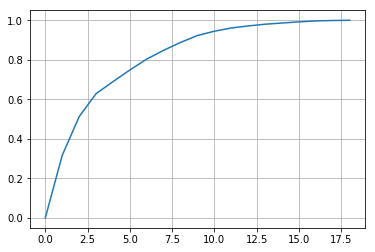

In [10]:
eig_val_ordered=eigen_values[eig_val_sorted_indices]
eig_val_cumul = np.cumsum(eig_val_ordered)
eig_val_cumul /= eig_val_cumul[-1]
plot([0]+list(eig_val_cumul))
grid()

In [11]:
sorted_eigvec = eigen_vectors[:,eig_val_sorted_indices]

In [12]:
data_proj_ev1 = np.dot(cdata,sorted_eigvec[:,:2])

### Plotting on Eigenvectors

In [13]:
N=data_proj_ev1.shape[0]
time_axis = np.arange(N)
type(time_axis)

numpy.ndarray

### Plot A: Breaking the day up into 16 time intervals and plotting for each interval

In [14]:
# we want to plot 16 intervals, so length of each interval will be total length divided by 16, rounded down.
print("Total length of data is ", data_proj_ev1.shape[0])
print("Divided by 16, we get ", data_proj_ev1.shape[0]/16)
print("Rounding this down... ",math.floor(data_proj_ev1.shape[0]/16))

Total length of data is  1680327
Divided by 16, we get  105020.4375
Rounding this down...  105020


In [15]:
righty = 1.25
lefty = -1
rightx = 1.5
leftx = -1.5

Each plot represents activity for roughly 840.16 seconds


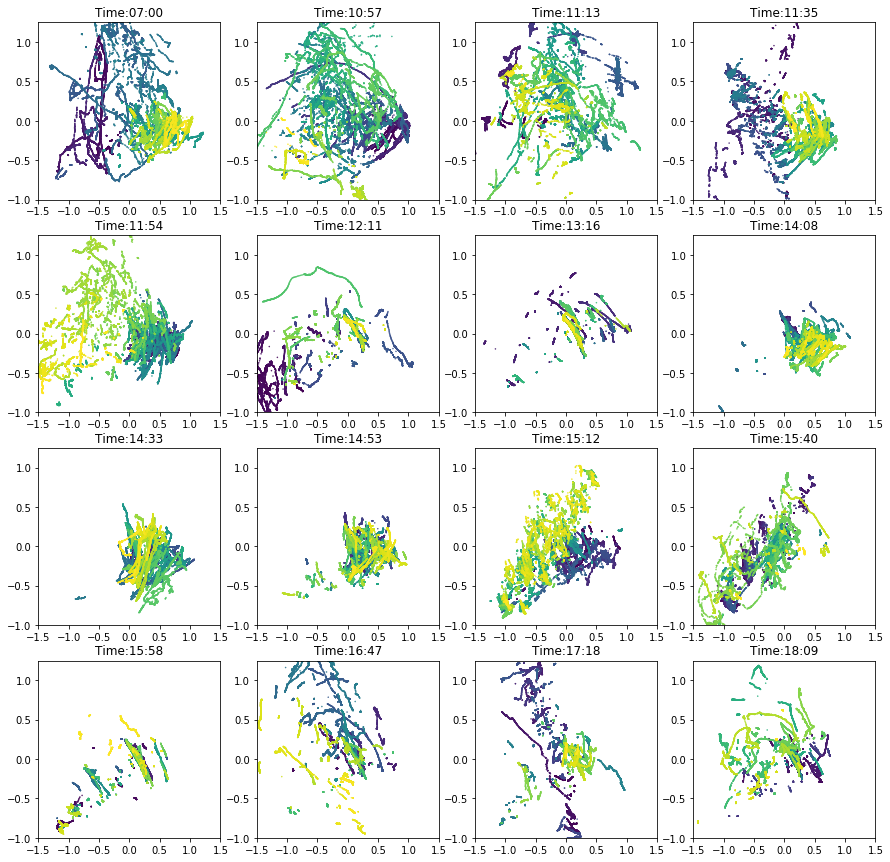

In [16]:
figure(figsize=[15,15])
Length=math.floor(data_proj_ev1.shape[0]/16)
print("Each plot represents activity for roughly " + str(Length * 0.008) + " seconds")
i=1
for T1 in range(0,data.shape[0],Length):
    subplot(4,4,i)
#     print(data_with_time[T1,12])
#     print(datetime.datetime.fromtimestamp(data_with_time[T1,12]))
    plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[T1,18]))[11:16])
    scatter(data_proj_ev1[T1:T1+Length,0], data_proj_ev1[T1:T1+Length,1],marker='.',s=1,c=np.arange(T1,T1+Length))
    
    colorbar
    
    plt.xlim(leftx,rightx)
    plt.ylim(lefty,righty)
    i=i+1
    if (i>16):
        break

### Looking closer at time of Exp 4 - 11:10 to 11:20 am

In [17]:
# setting the start and end times in the correct format

# can set start and end date-times here

format_timestring = '%b %d %Y %I:%M%p'

start_timestring = 'Aug 19 2020 11:10AM'
end_timestring = 'Aug 19 2020 11:20AM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)

2020-08-19 11:10:00
2020-08-19 11:20:00


In [18]:
# extracting the indices correctly

for x in range(data_with_time_array.shape[0]):
    if(data_with_time_array[x,18] > datetime.datetime.timestamp(start_standard_dt_string) and data_with_time_array[x,18] < datetime.datetime.timestamp(end_standard_dt_string)):
        start_index = x
        break
for y in range(x,data_with_time_array.shape[0]):
    if(data_with_time_array[y,18] > datetime.datetime.timestamp(end_standard_dt_string)):
        end_index = y
        break

In [19]:
x

187819

In [20]:
y

258785

In [21]:
# extracting only the relevant x and y coordinates
relevant_data_projections = data_proj_ev1[x:y]
relevant_data_projections.shape

(70966, 2)

In [22]:
# Dividing data into 10 time intervals of equal length (because we are displaying 10 minutes worth of data)

print("Total length of data is ", relevant_data_projections.shape[0])
print("Divided by 16, we get ", relevant_data_projections.shape[0]/10)
print("Rounding this down... ",math.floor(relevant_data_projections.shape[0]/10))

Total length of data is  70966
Divided by 16, we get  7096.6
Rounding this down...  7096


Each plot represents activity for roughly56.768 seconds


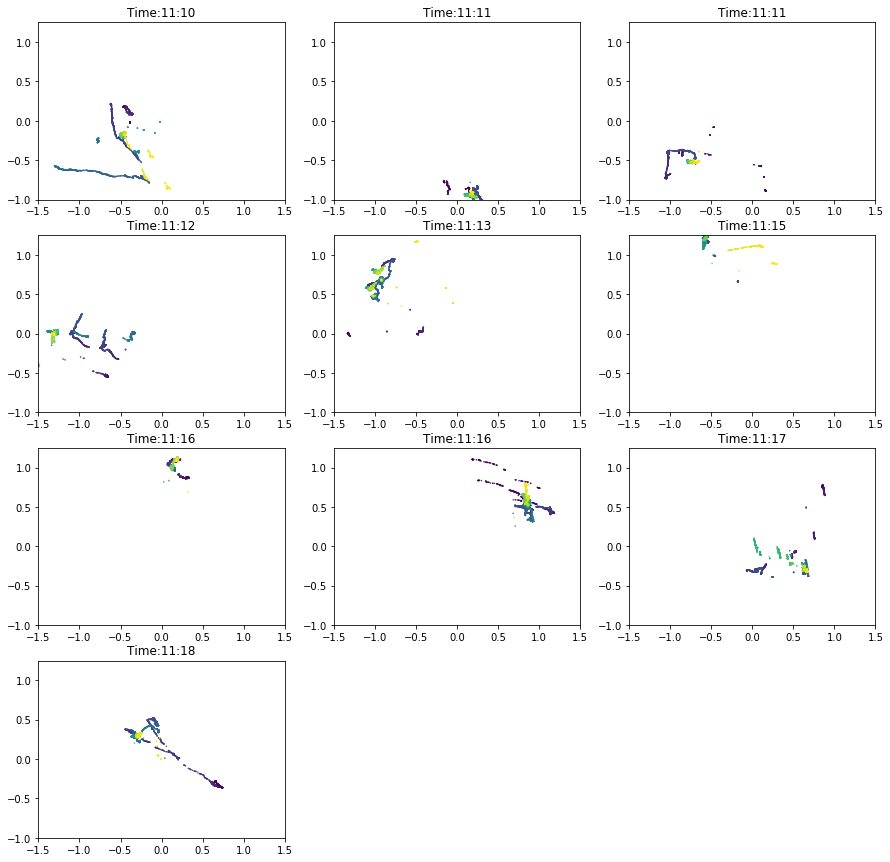

In [23]:
# plotting the relevant data

figure(figsize=[15,15])
Length=math.floor(relevant_data_projections.shape[0]/10)
print("Each plot represents activity for roughly" + str(Length * 0.008) + " seconds")
i=1
for T1 in range(0,relevant_data_projections.shape[0],Length):
    subplot(4,3,i)
#     print(data_with_time[T1,12])
#     print(datetime.datetime.fromtimestamp(data_with_time[T1,12]))
    plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x+T1,18]))[11:16])
    scatter(relevant_data_projections[T1:T1+Length,0], relevant_data_projections[T1:T1+Length,1],marker='.',s=1,c=np.arange(T1,T1+Length))
    colorbar
    plt.xlim(leftx,rightx)
    plt.ylim(lefty,righty)
    i=i+1
    if (i>10):
        break

### Plotting all data for experiment 4

2020-08-19 11:10:00
2020-08-19 11:20:00
Each plot represents activity for roughly 567.7280000000001 seconds


Text(0.5, 0, 'Projection of data on largest eigenvector')

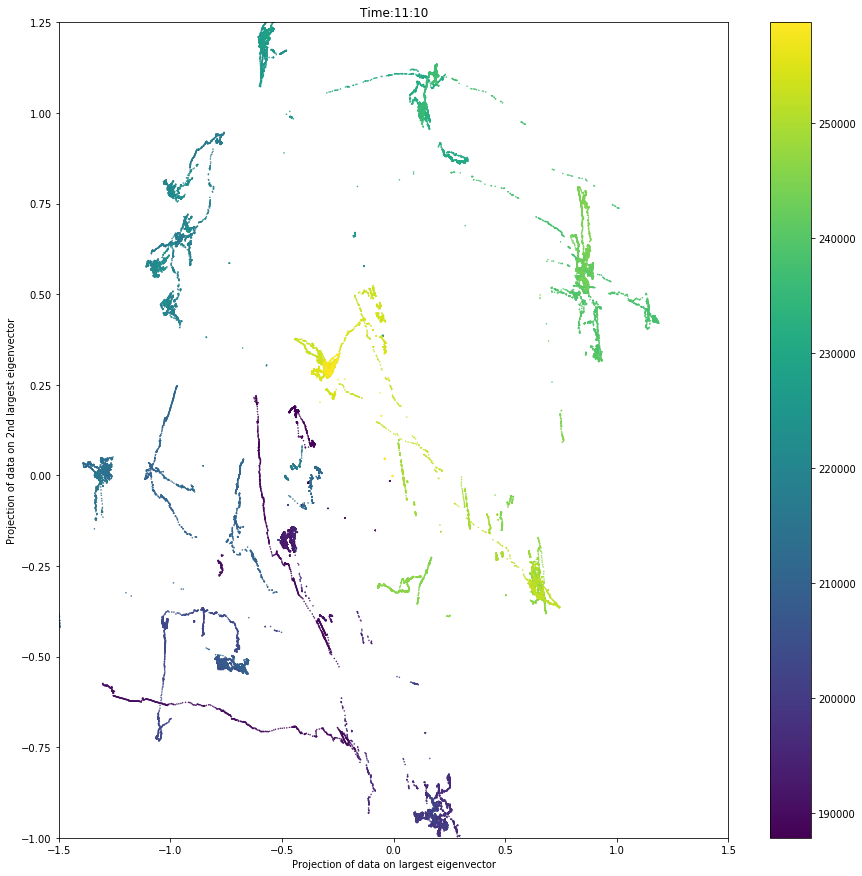

In [24]:
# setting the start and end times in the correct format

format_timestring = '%b %d %Y %I:%M%p'

start_timestring = 'Aug 19 2020 11:10AM'
end_timestring = 'Aug 19 2020 11:20AM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)



# given the starting and ending timestamps, we map them to indices of the data so that
# we know our time of interest in terms on indices

for x in range(data_with_time_array.shape[0]):
    if(data_with_time_array[x,18] > datetime.datetime.timestamp(start_standard_dt_string) and data_with_time_array[x,18] < datetime.datetime.timestamp(end_standard_dt_string)):
        start_index = x
        break
for y in range(x,data_with_time_array.shape[0]):
    if(data_with_time_array[y,18] > datetime.datetime.timestamp(end_standard_dt_string)):
        end_index = y
        break
        
        
# we can plot the data for our time of interest

figure(figsize=[15,15])
Length= y - x
print("Each plot represents activity for roughly " + str(Length * 0.008) + " seconds")

plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x,18]))[11:16])
scp = plt.scatter(data_proj_ev1[x:y,0], data_proj_ev1[x:y,1],marker='.',s=1,c=np.arange(x,y))
cb_scp = plt.colorbar(scp)
plt.xlim(leftx,rightx)
plt.ylim(lefty,righty)
plt.ylabel('Projection of data on 2nd largest eigenvector')
plt.xlabel('Projection of data on largest eigenvector')


### Taking projections onto each eigenvector and plotting magnitudes of the projections

In [25]:
# taking projections on all (sorted acc. to EV) eigenvectors instead of just the ones corr. to largest EVs

projection_matrix = np.dot(cdata,sorted_eigvec[:,:18])
projection_matrix.shape

(1680327, 18)

In [26]:
# taking only the ones relevant to experiment
relevant_projection_matrix = projection_matrix[x:y]
relevant_projection_matrix.shape

(70966, 18)

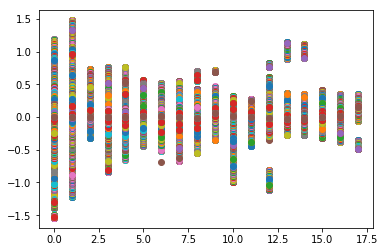

In [27]:
plot(relevant_projection_matrix.T, 'o');

### Playing audio between timestamps

In [30]:
# setting the start and end times in the correct format
# this cell converts date and hour into timestamp and prints the starting and ending timestamps

format_timestring = '%b %d %Y %I:%M:%S%p'

start_timestring = 'Aug 19 2020 11:10:00AM'
end_timestring = 'Aug 19 2020 11:11:00AM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print("Start time audio plot: ",start_standard_dt_string)
print("End time audio plot: ",end_standard_dt_string)

# given the starting and echait64mitnding timestamps, we map them to indices of the data so that
# we know our time of interest in terms on indices

for x in range(data_with_time_array.shape[0]):
    if(data_with_time_array[x,18] > datetime.datetime.timestamp(start_standard_dt_string) and data_with_time_array[x,18] < datetime.datetime.timestamp(end_standard_dt_string)):
        start_index = x
        break
for y in range(x,data_with_time_array.shape[0]):
    if(data_with_time_array[y,18] > datetime.datetime.timestamp(end_standard_dt_string)):
        end_index = y
        break
        


Start time audio plot:  2020-08-19 11:10:00
End time audio plot:  2020-08-19 11:11:00


In [31]:
# we can plot the data for our time of interest
import matplotlib
matplotlib.use('TkAgg')
plt.figure(figsize=[15,15])
Length= y - x
print("Length:" + " " + str(Length))
print("Each plot represents activity for " + str(Length * 0.008) + " seconds")

plt.title(str("Time:")+str(datetime.datetime.fromtimestamp(data_with_time_array[x,18]))[11:16])
scp = plt.scatter(data_proj_ev1[x:y,0], data_proj_ev1[x:y,1],marker='.',s=1,c=np.arange(x,y))
cb_scp = plt.colorbar(scp)
plt.xlim(leftx,rightx)
plt.ylim(lefty,righty)
plt.ylabel('Projection of data on 2nd largest eigenvector')
plt.xlabel('Projection of data on largest eigenvector')
print("Select two data points")
point_list = plt.ginput(2)
print("You clicked these points:", point_list)
plt.show()


# extract timestamps of two points
list_timestamps = []
list_raw_timestamps = []
# creating ckdtree out of all our points of interest
import scipy
ckdtree = scipy.spatial.cKDTree(data_proj_ev1[x:y])
# extracting the x and y coordinates of points from the ginput output list of tuples
for i in range(2):
    x_coor = point_list[i][0]
    y_coor = point_list[i][1]
    a = ckdtree.query([x_coor,y_coor])[1]
    ind = x + a
    plt.scatter(x_coor, y_coor,c = 'r', marker = "+")
    plt.text(x_coor,y_coor, str(datetime.datetime.fromtimestamp(data_with_time_array[ind,18]))[14:19]) ####
    
    print(x_coor,y_coor)
    # finding the index of the nearest point using ckdtree
    # index is therefore x + a
    
    list_raw_timestamps.append(data_with_time_array[ind,18])
    time_stamp_nearest_neighbour = datetime.datetime.fromtimestamp(data_with_time_array[ind,18])
    print(time_stamp_nearest_neighbour)
    list_timestamps.append(time_stamp_nearest_neighbour)


# arranging raw timestamps in increasing order
list_raw_timestamps.sort()
print(list_raw_timestamps)

# obtaining audio from raw files
# Load data

# postfiltered_2020-08-19_13_10_04_0.raw

import soundfile as sf
import sounddevice
import math
import pandas as pd
import itertools
import time
from functools import lru_cache

data,samplerate = sf.read('postfiltered_2020-08-19_11_10_03_0.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
                         )
format_timestring = '%b %d %Y %I:%M:%S%p'
T_s = 'Aug 19 2020 11:10:03PM'
T_s_std_str = datetime.datetime.strptime(T_s, format_timestring)
T_s_unix = datetime.datetime.timestamp(T_s_std_str)
sample_begin = int(round((list_raw_timestamps[0] - T_s_unix)*samplerate))
sample_end = int(round((list_raw_timestamps[1]-T_s_unix)*samplerate))
print((sample_begin),(sample_end))


# Sound playback
sounddevice.play(data[sample_begin:sample_end,0], samplerate)
time.sleep(1) 




ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'headless' is currently running

### Scratchpad

In [ ]:
# start time:
# end time:
# find elements in data from start time to end time and plot
start_hour = 13
start_minute = 30
# convert start_hour:start_minute:0:0 to timestamp
# find value equal to or closest to that timestamp in data - set to start index
# find value equal to or closest to end timestamp in data - set to end index
# extract subsequence
end_hour = 14
end_minute = 0

In [ ]:
format_timestring = '%b %d %Y %I:%M%p'

start_timestring = 'Jul 15 2020 01:40PM'
end_timestring = 'Jul 15 2020 02:00PM'
start_standard_dt_string = datetime.datetime.strptime(start_timestring, format_timestring)
end_standard_dt_string = datetime.datetime.strptime(end_timestring, format_timestring)

print(start_standard_dt_string)
print(end_standard_dt_string)

In [ ]:
# convert array of lists to an array of arrays
data = np.zeros((data_with_time_array.shape[0],13))
print(data.shape)
for (index,i) in enumerate(data_with_time_array):
    data[index] = np.asarray(data_with_time_array[index])